# Exploration of Inflation-Adjusted Revenue in Disney Dataset

##### <b>Author :</b> Muntakim Rahman &nbsp; <b>UBC Student Number :</b> 71065221

# Foreword

This **Jupyter Notebook** will be showing some exploratory data analysis for the `Disney` dataset. We're going to be investigating `Disney`'s historical box office records to get an idea of which projects yielded the highest gross revenue (adjusted for inflation).

Although total box office revenue is an important indicator, we are concerned with films which are able to sell a higher volume of tickets. We are going to assume this has a relatively linear correlation with *inflation-adjusted gross* revenue. Hence this will be our success indicator metric in this exploration.

# Introduction

## Intended Outcome
We can utilize our learnings to <u>replicate previous success & prevent previous failures</u> with respect to **Inflation Adjusted Gross** in upcoming projects.

## Questions(s) of Interests

In this analysis, I will be investigating questions associated with the highest **Inflation Adjusted Gross** for the `Disney` dataset located [here](https://data.world/kgarrett/disney-character-success-00-16).

### What I Want to Learn
* Which films had the highest inflation adjusted gross overall?

#### Decade Distributions
* How many films were released each decade?
* What is the highest grossing film for each decade?
* How much (inflation adjusted) gross revenue is (typically) being made by films through the decades? 
    * Are there any outliers in the data (i.e. decades with relatively higher/lower inflation adjusted grossing films)?
        * Which decades had the highest inflation adjusted grossing films? Is **Release Decade** a determining factor of our success indicator?

### Further Exploration - Will Be Performed Based on Data Availability

These are questions I want to explore given data availability in addition to the above analysis.

#### Highest Inflation Adjusted Grossing Films
* Which top 5 actors had the highest inflation adjusted grossing films by decade?
* Which top 5 directors had the highest inflation adjusted grossing films by decade?
* Which top 5 actors had the overall highest inflation adjusted grossing films?
* Which top 5 directors had the overall highest inflation adjusted grossing films?

#### Lowest Inflation Adjusted Grossing Films
* Which top 5 actors had the lowest inflation adjusted grossing films by decade?
* Which top 5 directors had the lowest inflation adjusted grossing films by decade?
* Which top 5 actors had the overall lowest inflation adjusted grossing films?
* Which top 5 directors had the overall lowest inflation adjusted grossing films?

## Dataset Description

This dataset provides an overview of *"Disney characters, box office success & annual gross income"*, as described by the source.

### Summary

"What are the trends in the Walt Disney Studio’s box office data? How do certain characters contribute to the success or failure of a movie?"

# Tabulated Data

In [1]:
# Lets import all the required libraries needed for this analysis
import pandas as pd

import altair as alt
from vega_datasets import data

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

import datetime as dt

from disney_functions import *

In [2]:
gross_df = pd.read_csv("data/disney_movies_total_gross.csv")
display(gross_df.head())

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [3]:
studio_df = pd.read_csv("data/disney_revenue_1991-2016.csv")
display(studio_df.head())

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [4]:
characters_df = pd.read_csv("data/disney-characters.csv")
display(characters_df.head())

,movie_title,release_date,hero,villian,song
0,\r\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,\r\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,\r\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,\r\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [5]:
directors_df = pd.read_csv("data/disney-director.csv")
display(directors_df.head())

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


In [6]:
voice_actors_df = pd.read_csv("data/disney-voice-actors.csv")
display(voice_actors_df.head())

,character,voice-actor,movie
0,Abby Mallard,Joan Cusack,Chicken Little
1,Abigail Gabble,Monica Evans,The Aristocats
2,Abis Mal,Jason Alexander,The Return of Jafar
3,Abu,Frank Welker,Aladdin
4,Achilles,None,The Hunchback of Notre Dame


## Clean Data

### Convert Dates to Type DateTime.Date 

We are primarily interested in release month and year to account for data inconsistencies.

In [7]:
gross_df["release_year"] = gross_df["release_date"].apply(
    lambda effective_date: dt.datetime.strptime(effective_date, "%b %d, %Y").date().year
)
gross_df["release_month"] = gross_df["release_date"].apply(
    lambda effective_date: dt.datetime.strptime(effective_date, "%b %d, %Y")
    .date()
    .month
)

In [8]:
characters_df["release_year"] = characters_df["release_date"].apply(
    lambda effective_date: dt.datetime.strptime(effective_date, "%B %d, %Y").date().year
)
characters_df["release_month"] = characters_df["release_date"].apply(
    lambda effective_date: dt.datetime.strptime(effective_date, "%B %d, %Y")
    .date()
    .month
)

In [9]:
## Let's look at the release month-year information for the movies to deal with data inconsistencies.

gross_df.drop(columns=["release_date"], inplace=True)
characters_df.drop(columns=["release_date"], inplace=True)

In [10]:
display(gross_df.head())

,movie_title,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year,release_month
0,Snow White and the Seven Dwarfs,Musical,G,"$184,925,485","$5,228,953,251",1937,12
1,Pinocchio,Adventure,G,"$84,300,000","$2,188,229,052",1940,2
2,Fantasia,Musical,G,"$83,320,000","$2,187,090,808",1940,11
3,Song of the South,Adventure,G,"$65,000,000","$1,078,510,579",1946,11
4,Cinderella,Drama,G,"$85,000,000","$920,608,730",1950,2


In [11]:
display(characters_df.head())

,movie_title,hero,villian,song,release_year,release_month
0,\r\nSnow White and the Seven Dwarfs,Snow White,Evil Queen,Some Day My Prince Will Come,1937,12
1,\r\nPinocchio,Pinocchio,Stromboli,When You Wish upon a Star,1940,2
2,\r\nFantasia,NaN,Chernabog,NaN,1940,11
3,Dumbo,Dumbo,Ringmaster,Baby Mine,1941,10
4,\r\nBambi,Bambi,Hunter,Love Is a Song,1942,8


### Complete DataFrame (With Merged Tables)

In [12]:
# Villain was mispelled as villain in the characters dataset. Let's fix that.
characters_df.rename(columns={"villian": "villain"}, inplace=True)

In [13]:
characters_df["movie_title"] = characters_df["movie_title"].str.replace("\r\n", "")

## Lets merge the gross_df and characters_df.

char_revenue_df = pd.merge(
    gross_df,
    characters_df,
    on=["movie_title", "release_year", "release_month"],
    how="outer",
)

display(char_revenue_df.head())

,movie_title,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year,release_month,hero,villain,song
0,Snow White and the Seven Dwarfs,Musical,G,"$184,925,485","$5,228,953,251",1937,12,Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,Adventure,G,"$84,300,000","$2,188,229,052",1940,2,Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,Musical,G,"$83,320,000","$2,187,090,808",1940,11,NaN,Chernabog,NaN
3,Song of the South,Adventure,G,"$65,000,000","$1,078,510,579",1946,11,NaN,NaN,NaN
4,Cinderella,Drama,G,"$85,000,000","$920,608,730",1950,2,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo


In [14]:
## Lets merge the char_revenue_df and directors_df.
directors_df.rename(columns={"name": "movie_title"}, inplace=True)

film_revenue_df = pd.merge(char_revenue_df, directors_df, on="movie_title", how="outer")

display(film_revenue_df.head())

,movie_title,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year,release_month,hero,villain,song,director
0,Snow White and the Seven Dwarfs,Musical,G,"$184,925,485","$5,228,953,251",1937,12,Snow White,Evil Queen,Some Day My Prince Will Come,David Hand
1,Pinocchio,Adventure,G,"$84,300,000","$2,188,229,052",1940,2,Pinocchio,Stromboli,When You Wish upon a Star,Ben Sharpsteen
2,Fantasia,Musical,G,"$83,320,000","$2,187,090,808",1940,11,NaN,Chernabog,NaN,full credits
3,Song of the South,Adventure,G,"$65,000,000","$1,078,510,579",1946,11,NaN,NaN,NaN,NaN
4,Cinderella,Drama,G,"$85,000,000","$920,608,730",1950,2,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo,Wilfred Jackson


### Merge Duplicate Rows

#### Multiple Voice Actors For a Single Character

In [15]:
voice_actors_df.rename(columns={"movie": "movie_title"}, inplace=True)
voice_actors_df.sort_values(by=["movie_title"]).reset_index(drop=True, inplace=True)

In [16]:
hero_actors_df = merge_on_actor(voice_actors_df, film_revenue_df, char_type="hero")

In [17]:
villain_actors_df = merge_on_actor(
    voice_actors_df, film_revenue_df, char_type="villain"
)

In [18]:
complete_cols = hero_actors_df.columns.to_list() + villain_actors_df.columns.to_list()
complete_cols = list(dict.fromkeys(complete_cols))

In [19]:
effective_cols = [col for col in complete_cols if col.find("actor") == -1]
complete_df = pd.merge(
    hero_actors_df, villain_actors_df, on=effective_cols, how="outer"
)
complete_df = complete_df.assign(
    release_decade=get_release_decade(complete_df["release_year"])
)

Get gross in numerical datatype (i.e. `float64`)

In [20]:
complete_df = complete_df.assign(
    total_gross=complete_df["total_gross"].apply(lambda x: get_totalgross_value(x))
)
complete_df = complete_df.assign(
    inflation_adjusted_gross=complete_df["inflation_adjusted_gross"].apply(
        lambda x: get_totalgross_value(x)
    )
)

In [21]:
display(complete_cols)

['movie_title',
 'genre',
 'MPAA_rating',
 'total_gross',
 'inflation_adjusted_gross',
 'release_year',
 'release_month',
 'hero',
 'villain',
 'song',
 'director',
 'hero-actor',
 'villain-actor']

In [22]:
complete_cols = [
    "movie_title",
    "release_decade",
    "release_year",
    "release_month",
    "total_gross",
    "inflation_adjusted_gross",
    "director",
    "MPAA_rating",
    "genre",
    "hero-actor",
    "hero",
    "villain-actor",
    "villain",
    "song",
]

complete_df = (
    complete_df[complete_cols]
    .sort_values(by=["release_year", "movie_title"])
    .reset_index(drop=True)
)

In [23]:
display(complete_df.head())

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
2,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
3,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine
4,Bambi,1940,1942,8,NaN,NaN,David Hand,NaN,NaN,Donnie Dunagan; Hardie Albright; Alexander Gould,Bambi,NaN,Hunter,Love Is a Song


#### Sum Box Office Revenue for Movie Rereleases

In [24]:
# Look for Repeated Movie Entries
display(
    complete_df[
        complete_df.duplicated(
            subset=["movie_title", "director", "genre", "MPAA_rating"]
        )
    ]
)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
240,101 Dalmatians,1990,1996,11,136189294.0,258728898.0,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
592,The Jungle Book,2010,2016,4,364001123.0,364001123.0,Wolfgang Reitherman,PG,Adventure,NaN,NaN,NaN,NaN,NaN


In [25]:
display(
    complete_df[
        (complete_df["movie_title"] == "101 Dalmatians")
        | (complete_df["movie_title"] == "The Jungle Book")
    ]
)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
18,101 Dalmatians,1960,1961,1,153000000.0,1.362871e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
24,The Jungle Book,1960,1967,10,141843000.0,7.896123e+08,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
201,The Jungle Book,1990,1994,12,44342956.0,8.893032e+07,Wolfgang Reitherman,PG,Adventure,NaN,NaN,NaN,NaN,NaN
240,101 Dalmatians,1990,1996,11,136189294.0,2.587289e+08,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
592,The Jungle Book,2010,2016,4,364001123.0,3.640011e+08,Wolfgang Reitherman,PG,Adventure,NaN,NaN,NaN,NaN,NaN


##### The Jungle Book Data Quality

Through a quick glance here, this is another instance of data quality issues in the dataset. *The Jungle Book* rerelease in 1990 has a different `MPAA_rating` and `genre` as well as other fields from the initial release. This makes it seem as if it is another film, which is not the case. The *2016* live-action adaptation  of *The Jungle Book* is indeed <u>another film</u> and was directed by *Jon Favreau*. This is mislabeled as *Wolfgang Reitherman*, which is highly problematic for our analysis as it will skew our results. We need to clean this data.

In our data cleaning procedure, we could have merged these two records together based on `movie_title` and `director`. Since **Disney** has a track record for remakes and live action adaptations, we can't be certain these are releases. 

What would we do in the case that a film is remade by the same director? There are a series of directors who have done so in the past - *Alfred Hitchcock* had remade *The Man Who Knew Too Much*, originally released in *1934* and remade in *1956*.

In [26]:
remake_index = complete_df[
    (complete_df["movie_title"] == "The Jungle Book")
    & (complete_df["release_year"] == 2016)
].index[0]
complete_df.at[remake_index, "director"] = "Jon Favreau"

complete_df.query('movie_title == "The Jungle Book"')

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
24,The Jungle Book,1960,1967,10,141843000.0,789612346.0,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
201,The Jungle Book,1990,1994,12,44342956.0,88930321.0,Wolfgang Reitherman,PG,Adventure,NaN,NaN,NaN,NaN,NaN
592,The Jungle Book,2010,2016,4,364001123.0,364001123.0,Jon Favreau,PG,Adventure,NaN,NaN,NaN,NaN,NaN


In [27]:
# Let's Make Things Easier for Us in Passing the Rerelease to Our Function.
jungle_book_df = complete_df[
    (complete_df["movie_title"] == "The Jungle Book")
    & (complete_df["release_year"] != 2016)
].sort_values(by=["release_year"])

original_index = jungle_book_df.index[0]
rerelease_index = jungle_book_df.index[1:]

for i in rerelease_index:
    complete_df.at[i, "MPAA_rating"] = complete_df.at[original_index, "MPAA_rating"]
    complete_df.at[i, "genre"] = complete_df.at[original_index, "genre"]

complete_df.query('movie_title == "The Jungle Book"')

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
24,The Jungle Book,1960,1967,10,141843000.0,789612346.0,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
201,The Jungle Book,1990,1994,12,44342956.0,88930321.0,Wolfgang Reitherman,Not Rated,Musical,NaN,NaN,NaN,NaN,NaN
592,The Jungle Book,2010,2016,4,364001123.0,364001123.0,Jon Favreau,PG,Adventure,NaN,NaN,NaN,NaN,NaN


In [28]:
complete_df = add_rereleases(complete_df)

In [29]:
display(
    complete_df[
        (complete_df["movie_title"] == "101 Dalmatians")
        | (complete_df["movie_title"] == "The Jungle Book")
    ]
)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
18,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
24,The Jungle Book,1960,1967,10,186185956.0,8.785427e+08,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
590,The Jungle Book,2010,2016,4,364001123.0,3.640011e+08,Jon Favreau,PG,Adventure,NaN,NaN,NaN,NaN,NaN


In [30]:
# Look for Repeated Movie Entries
display(
    complete_df[
        complete_df.duplicated(
            subset=["movie_title", "director", "genre", "MPAA_rating"]
        )
    ].movie_title.unique()
)

array([], dtype=object)

In [31]:
display(complete_df.head())

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
2,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
3,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine
4,Bambi,1940,1942,8,NaN,NaN,David Hand,NaN,NaN,Donnie Dunagan; Hardie Albright; Alexander Gould,Bambi,NaN,Hunter,Love Is a Song


## Assess Feasibility of Analysis 

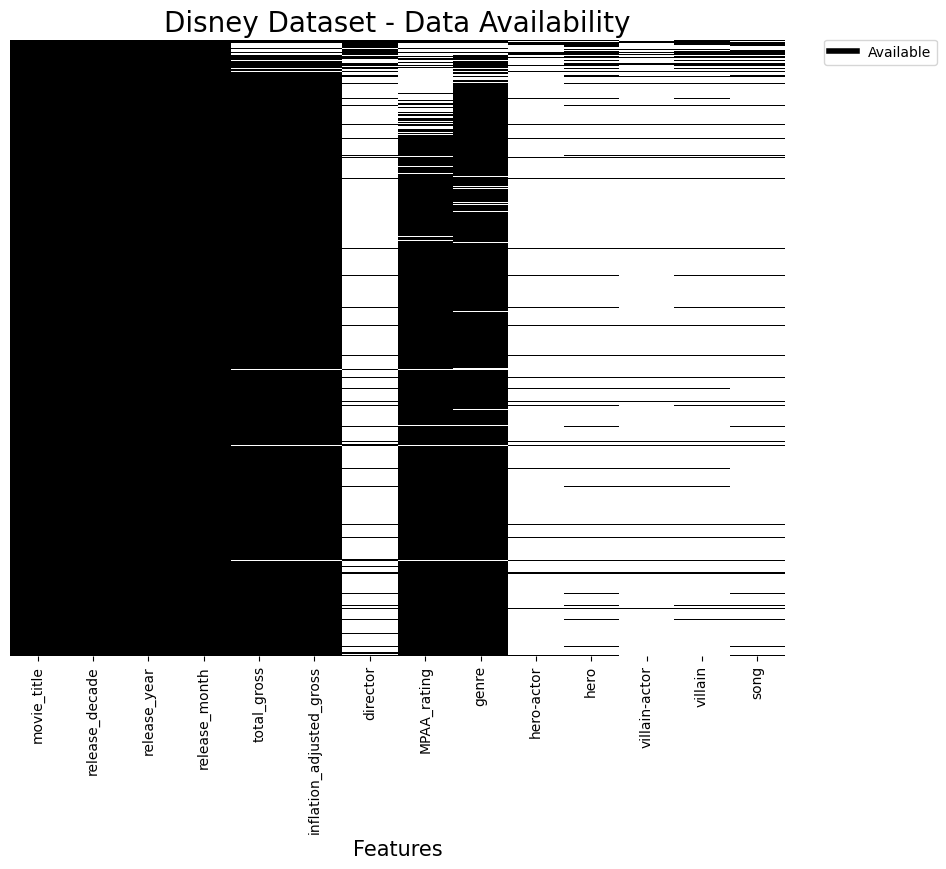

In [32]:
# Look at Data Sparsity in Complete DataFrame
plt.figure(figsize=(10, 8))

custom_lines = [Line2D([0], [0], color="black", lw=4)]

sparsity_plot = sns.heatmap(
    complete_df.notnull(), cmap="binary", cbar=False, yticklabels=False
)

sparsity_plot.set_xlabel("Features", fontsize=15)

sparsity_plot.set_title("Disney Dataset - Data Availability", fontsize=20)

plt.legend(
    custom_lines,
    ["Available"],
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)

plt.show()

Fortunately, there appears to be *~100%* data availability for `release_decade`, which is extracted from the `release_date` column.</br> 
We should be set to get accurate insights for our exploration of `release_decade` v `inflation_adjusted_gross`.

That's pretty disappointing to see that we have such high data sparsity in the following columns :
* director
* hero-actor
* hero
* villain-actor
* villain
* song

This is going to affect our ability to perform the feature discovery for `inflation_adjusted_gross`. 
Note : If we were able to identify potential features which exhibit *linear correlation* with the `inflation_adjusted_gross`, we may have been able to utilize this in building a **Regression Machine Learning** model.

# Release Decade & Inflation Adjusted Gross

Here are the top 5 movies by inflation adjusted gross.

In [33]:
# Let's order our complete dataframe in descending order of inflation adjusted gross.
complete_df.sort_values(by="inflation_adjusted_gross", ascending=False, inplace=True)
complete_df.reset_index(drop=True, inplace=True)

display(complete_df.head(5))

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
4,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte


Through observing the top 5 highest grossing films when adjusted for inflation, we can see this data sparsity issue entailing missing features.

## Record Distribution By Decade

In [34]:
plot_df = complete_df.query("release_decade == release_decade").assign(
    release_decade=complete_df["release_decade"].apply(lambda x: str(x) + "s")
)

In [35]:
display_histogram(
    effective_df=plot_df,
    feature="release_decade",
    maxbins=False,  # We don't want to bin the data.
    target="count()",
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

## Highest Grossing Film of Each Decade

This dataframe is ordered in ascending order of `release_decade`, then decending order of `inflation_adjusted_gross`.

In [36]:
complete_df.sort_values(
    by=["release_decade", "inflation_adjusted_gross"],
    ascending=[True, False],
    inplace=True,
)
complete_df.reset_index(drop=True, inplace=True)

display(complete_df.head(5))

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
4,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine


These are the highest grossing films of each decade in ascending order of `release_decade`.


In [37]:
# Let's get the highest grossing movie for each decade.
effective_indices = [
    i
    for decade in complete_df["release_decade"].unique()
    for i in complete_df[complete_df["release_decade"] == decade]
    .head(1)
    .index.to_list()
]

highest_grossing_decade_df = complete_df.loc[effective_indices].reset_index(drop=True)

display(highest_grossing_decade_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
3,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
4,The Aristocats,1970,1970,4,55675257.0,2.551615e+08,Wolfgang Reitherman,G,Musical,NaN,NaN,NaN,NaN,NaN
5,3 Men and a Baby,1980,1987,11,167780960.0,3.533346e+08,NaN,PG,Comedy,NaN,NaN,NaN,NaN,NaN
6,The Lion King,1990,1994,6,422780140.0,7.616409e+08,Roger Allers,G,Adventure,Jonathan Taylor Thomas; Matthew Broderick,Simba,Jeremy Irons,Scar,Circle of Life
7,Pirates of the Caribbean: Dead Man’…,2000,2006,7,423315812.0,5.448171e+08,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
8,Star Wars Ep. VII: The Force Awakens,2010,2015,12,936662225.0,9.366622e+08,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN


## Lowest Grossing Film of Each Decade

This dataframe is ordered in ascending order of `release_decade`, then ascending order of `inflation_adjusted_gross`.

In [38]:
complete_df.sort_values(
    by=["release_decade", "inflation_adjusted_gross"],
    ascending=[True, True],
    inplace=True,
)
complete_df.reset_index(drop=True, inplace=True)

display(complete_df.head(5))

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
4,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine


In [39]:
# Let's get the lowest grossing movie for each decade.
effective_indices = [
    i
    for decade in complete_df["release_decade"].unique()
    for i in complete_df[complete_df["release_decade"] == decade]
    .head(1)
    .index.to_list()
]

lowest_grossing_decade_df = complete_df.loc[effective_indices][
    complete_df["inflation_adjusted_gross"].notna()
]
lowest_grossing_decade_df = complete_df.loc[effective_indices].reset_index(drop=True)

display(lowest_grossing_decade_df)

C:\Users\Muntakim\AppData\Local\Temp\ipykernel_25496\3134541077.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_grossing_decade_df = complete_df.loc[effective_indices][


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
2,Sleeping Beauty,1950,1959,1,9464608.0,2.150583e+07,Clyde Geronimi,NaN,Drama,Mary Costa,Aurora,Eleanor Audley,Maleficent,Once Upon a Dream
3,Bon Voyage!,1960,1962,5,9230769.0,1.095816e+08,NaN,Not Rated,Comedy,NaN,NaN,NaN,NaN,NaN
4,The Many Adventures of Winnie the Pooh,1970,1977,3,0.0,0.000000e+00,Wolfgang Reitherman,NaN,NaN,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh
5,Condorman,1980,1981,8,0.0,0.000000e+00,NaN,NaN,Action,NaN,NaN,NaN,NaN,NaN
6,The War at Home,1990,1996,11,34368.0,6.554300e+04,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN
7,Frank McKlusky C.I.,2000,2002,1,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Zokkomon,2010,2011,4,2815.0,2.984000e+03,NaN,PG,Adventure,NaN,NaN,NaN,NaN,NaN


We're not going to visualize the distributions of the inflation adjusted highest/lowest grossing film for each decade. These films may just be outliers in our larger dataset. 

## Inflation Adjusted Gross Distribution By Decade

In [40]:
display_histogram(
    effective_df=complete_df,
    feature="inflation_adjusted_gross",
    target="release_decade",
    maxbins=10,
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

There appears to be a few major outliers in the data visualized above. There are tiny slivers of data for films with `inflation_adjusted_gross` > $<i>1*10^9</i>. 


### Films With Inflation Adjusted Gross Greater Than/Equal To $1*10^9.
Let's take a closer look at films which meet and exceed this threshold. 

In [41]:
geq_1e9_df = complete_df.query(f"inflation_adjusted_gross >= 1e9")
display(geq_1e9_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
15,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
24,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN


In [42]:
display_histogram(
    effective_df=geq_1e9_df,
    feature="inflation_adjusted_gross",
    target="release_decade",
    maxbins=10,
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

These films were exclusively released between the *1930*s and *1960*s. The upper bounds of `inflation_adjusted_gross` seems to have been during this era. If Disney wishes to replicate these extremes of success, we need to understand what caused this trend, looking at macroeconomic factors (in which case, perhaps there is a lot replicability) and even internal business practices adopted during these projects.

Let's look at the rest of the data below this threshold.

In [43]:
lt_1e9_index = [i for i in complete_df.index if i not in geq_1e9_df.index.to_list()]
lt_1e9_df = complete_df.loc[lt_1e9_index].reset_index(drop=True)

display(lt_1e9_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine
1,Bambi,1940,1942,8,NaN,NaN,David Hand,NaN,NaN,Donnie Dunagan; Hardie Albright; Alexander Gould,Bambi,NaN,Hunter,Love Is a Song
2,Saludos Amigos,1940,1943,2,NaN,NaN,Jack Kinney,NaN,NaN,NaN,Donald Duck,NaN,NaN,Saludos Amigos\r\n
3,The Three Caballeros,1940,1945,2,NaN,NaN,Norman Ferguson,NaN,NaN,NaN,Donald Duck,NaN,NaN,NaN
4,Make Mine Music,1940,1946,4,NaN,NaN,Jack Kinney,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Avengers: Age of Ultron,2010,2015,5,459005868.0,459005868.0,NaN,PG-13,Action,NaN,NaN,NaN,NaN,NaN
583,Finding Dory,2010,2016,6,486295561.0,486295561.0,NaN,PG,Adventure,NaN,NaN,NaN,NaN,NaN
584,Rogue One: A Star Wars Story,2010,2016,12,529483936.0,529483936.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
585,The Avengers,2010,2012,5,623279547.0,660081224.0,NaN,PG-13,Action,NaN,NaN,NaN,NaN,NaN


In [44]:
display_histogram(
    effective_df=lt_1e9_df,
    feature="inflation_adjusted_gross",
    target="release_decade",
    maxbins=10,
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Similarly, we may want to exclude films with `inflation_adjusted_gross` >= $<i>5*10^8</i>.

### Films With Inflation Adjusted Gross Greater Than/Equal To $5*10^8.
Let's take a closer look at films which meet and exceed this threshold.

In [45]:
geq_5e8_df = complete_df.query(f"inflation_adjusted_gross >= 5e8")
display(geq_5e8_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
1,Song of the South,1940,1946,11,65000000.0,1.078511e+09,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
3,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
13,"20,000 Leagues Under the Sea",1950,1954,12,28200000.0,5.282800e+08,NaN,NaN,Adventure,NaN,NaN,NaN,NaN,NaN
14,Cinderella,1950,1950,2,85000000.0,9.206087e+08,Wilfred Jackson,G,Drama,Ilene Woods,Cinderella,Eleanor Audley; Susanne Blakeslee,Lady Tremaine,Bibbidi-Bobbidi-Boo
15,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
23,The Jungle Book,1960,1967,10,186185956.0,8.785427e+08,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
24,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
331,The Lion King,1990,1994,6,422780140.0,7.616409e+08,Roger Allers,G,Adventure,Jonathan Taylor Thomas; Matthew Broderick,Simba,Jeremy Irons,Scar,Circle of Life


In [46]:
display_histogram(
    effective_df=geq_5e8_df,
    feature="inflation_adjusted_gross",
    target="release_decade",
    maxbins=10,
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

This is really interesting. We now have more recent films included in this data as the *1990*s, *2000*s, and *2010*s are present in the data which meets this threshold. Let's look at the data visualized here which was released past the *1960*s.

#### Films Released Past 1960s Which Meet Threshold

In [47]:
geq5e8_1960s_df = geq_5e8_df.query(f"release_decade > 1960")
display_histogram(
    geq5e8_1960s_df,
    feature="inflation_adjusted_gross",
    target="release_decade",
    maxbins=10,
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Observations 
* There are *2* films from the *2000*s which have grossed between $<i>5.0-5.5*10^8</i> when adjusted for inflation.  
* There are *3* films from the *2010*s which have grossed >= $<i>5*10^8</i> when adjusted from inflation. 
    * One of these films from the *2010*s have grossed between $<i>9.0-9.5*10^8</i> which is highly interesting.
* There is *1* film from the *1990*s which has grossed between $<i>7.5-8.0*10^8</i>. This seems to be a sole project from this decade which has passed this threshold, which is interesting as well.

In [48]:
geq5e8_1960s_df.sort_values(
    by="inflation_adjusted_gross", ascending=False, inplace=True
)
geq5e8_1960s_df.reset_index(drop=True, inplace=True)

display(geq5e8_1960s_df)

C:\Users\Muntakim\AppData\Local\Temp\ipykernel_25496\3979521889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geq5e8_1960s_df.sort_values(


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Star Wars Ep. VII: The Force Awakens,2010,2015,12,936662225.0,936662225.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
1,The Lion King,1990,1994,6,422780140.0,761640898.0,Roger Allers,G,Adventure,Jonathan Taylor Thomas; Matthew Broderick,Simba,Jeremy Irons,Scar,Circle of Life
2,The Avengers,2010,2012,5,623279547.0,660081224.0,NaN,PG-13,Action,NaN,NaN,NaN,NaN,NaN
3,Pirates of the Caribbean: Dead Man’…,2000,2006,7,423315812.0,544817142.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
4,Rogue One: A Star Wars Story,2010,2016,12,529483936.0,529483936.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
5,Finding Nemo,2000,2003,5,380529370.0,518148559.0,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN


This is pretty interesting. Most of these are franchise films.</br></br>
The outliers are :
    <li>*Finding Nemo* was a **Pixar** film prior to the **Disney** acquisition.</li>
    <li>*The Lion King* is a standalone animation.</li>

#### Star Wars Films
What made *Star Wars Ep. VII: The Force Awakens* such a major success in this time period?</br>
Let's look at the other films in the **Star Wars** franchise. 

In [49]:
star_wars_df = complete_df[
    complete_df["movie_title"].str.lower().str.contains("star")
    & complete_df["movie_title"].str.lower().str.contains("wars")
]
display(star_wars_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
590,Rogue One: A Star Wars Story,2010,2016,12,529483936.0,529483936.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN
592,Star Wars Ep. VII: The Force Awakens,2010,2015,12,936662225.0,936662225.0,NaN,PG-13,Adventure,NaN,NaN,NaN,NaN,NaN


We only have data for *2* of the films in the **Star Wars** franchise. This is an implicit data sparsity issue as there are *10* films in the franchise.

This dataset should be updated to reflect the box office history for this franchise prior to the **Disney** acquisition of **Lucasfilm** as well as to reflect the box office history for the *Star Wars* films released after the acquisition.

### Films With Inflation Adjusted Gross Less Than $5*10^8.

In [50]:
lt_5e8_index = [i for i in complete_df.index if i not in geq_5e8_df.index.to_list()]
lt_5e8_df = complete_df.loc[lt_5e8_index].reset_index(drop=True)

display(lt_5e8_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Dumbo,1940,1941,10,NaN,NaN,Ben Sharpsteen,NaN,NaN,None,Dumbo,NaN,Ringmaster,Baby Mine
1,Bambi,1940,1942,8,NaN,NaN,David Hand,NaN,NaN,Donnie Dunagan; Hardie Albright; Alexander Gould,Bambi,NaN,Hunter,Love Is a Song
2,Saludos Amigos,1940,1943,2,NaN,NaN,Jack Kinney,NaN,NaN,NaN,Donald Duck,NaN,NaN,Saludos Amigos\r\n
3,The Three Caballeros,1940,1945,2,NaN,NaN,Norman Ferguson,NaN,NaN,NaN,Donald Duck,NaN,NaN,NaN
4,Make Mine Music,1940,1946,4,NaN,NaN,Jack Kinney,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Frozen,2010,2013,11,400738009.0,414997174.0,Chris Buck,PG,Adventure,Idina Menzel,Elsa,Santino Fontana,Prince Hans,Let It Go\r\n
574,Iron Man 3,2010,2013,5,408992272.0,424084233.0,NaN,PG-13,Action,NaN,NaN,NaN,NaN,NaN
575,Toy Story 3,2010,2010,6,415004880.0,443408255.0,NaN,G,Adventure,NaN,NaN,NaN,NaN,NaN
576,Avengers: Age of Ultron,2010,2015,5,459005868.0,459005868.0,NaN,PG-13,Action,NaN,NaN,NaN,NaN,NaN


In [51]:
display_histogram(
    effective_df=lt_5e8_df,
    feature="inflation_adjusted_gross",
    target="release_decade",
    maxbins=10,
)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

It's appears that there is a **exponential decay**-like relationship between `inflation_adjusted_gross` and the `record count`. **Disney**'s historical track record tends towards outputting films with relatively lower `inflation_adjusted_gross` values.

This seems to be the case across the remaining decades here, with a few exceptions. The <i>2010</i>s seem interesting. There are a few films which have `inflation_adjusted_gross` between $<i>2.0-2.5*10^8</i>

# Directors and Actors Exploration

In [52]:
exploration_df = complete_df[
    complete_df["inflation_adjusted_gross"].notna()
].sort_values(by="inflation_adjusted_gross", ascending=False)

## Directors & Inflation Adjusted Gross

In [53]:
display(exploration_df[exploration_df["director"].notna()].head())

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come
3,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
2,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
24,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
15,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte


In [54]:
display(exploration_df[exploration_df["director"].notna()].tail())

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
71,The Great Mouse Detective,1980,1986,7,23605534.0,53637367.0,Ron Clements,NaN,Adventure,NaN,Basil,Vincent Price,Professor Ratigan,The World's Greatest Criminal Mind
69,The Black Cauldron,1980,1985,7,21288692.0,50553142.0,Ted Berman,NaN,Adventure,Grant Bardsley,Taran,NaN,Horned King,NaN
527,Winnie the Pooh,2010,2011,7,26692846.0,28375869.0,Stephen J. Anderson,G,Adventure,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh\r\n
12,Sleeping Beauty,1950,1959,1,9464608.0,21505832.0,Clyde Geronimi,NaN,Drama,Mary Costa,Aurora,Eleanor Audley,Maleficent,Once Upon a Dream
26,The Many Adventures of Winnie the Pooh,1970,1977,3,0.0,0.0,Wolfgang Reitherman,NaN,NaN,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh


In [55]:
director_plots = display_concat_histograms(
    effective_df=exploration_df,
    feature="inflation_adjusted_gross",
    target="director",
    category_title="Grossing Films",
    maxbins=5,
    record_count=5,
)

display(director_plots)

Lowest Grossing Films:


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,The Many Adventures of Winnie the Pooh,1970,1977,3,0.0,0.0,Wolfgang Reitherman,NaN,NaN,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh
1,Sleeping Beauty,1950,1959,1,9464608.0,21505832.0,Clyde Geronimi,NaN,Drama,Mary Costa,Aurora,Eleanor Audley,Maleficent,Once Upon a Dream
2,Winnie the Pooh,2010,2011,7,26692846.0,28375869.0,Stephen J. Anderson,G,Adventure,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh\r\n
3,The Black Cauldron,1980,1985,7,21288692.0,50553142.0,Ted Berman,NaN,Adventure,Grant Bardsley,Taran,NaN,Horned King,NaN
4,The Great Mouse Detective,1980,1986,7,23605534.0,53637367.0,Ron Clements,NaN,Adventure,NaN,Basil,Vincent Price,Professor Ratigan,The World's Greatest Criminal Mind




Highest Grossing Films:


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
42,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
43,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
44,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
45,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
46,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come


c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.ConcatChart(...)

From our data, we are able to look at *5* of the `lowest grossing films` and *5* of the `highest grossing films` out of the *films with non-null director information*. 

We've accounted for duplicates and filtered them from the `Highest Grossing Films : Distribution`. The decision was made to classify these with the `Lowest Grossing Films : Distribution` as we can't really rely on these being projects we'd like to replicate in upcoming initiatives.

Starting with Highest Grossing Films :</br>
<ul>
    <li>
        <i>David Hand</i> directed the highest grossing film when adjusted for inflation, which happens to be the highest grossing film in the entire dataset (i.e. <i>Snow White</i>).
    </li> 
</ul>

Looking at Lowest Grossing Films :</br>
<ul>
    <li>
        <i>Wolfgang Reitherman</i> directed the lowest grossing film when adjusted for inflation and another film which was included in the plot for the highest grossing films.
        <ul>
            <li>
                Perhaps his work isn't completely replicable. We might have to look into when his projects have been more/less successful financially.
            </li>
        </ul>
    </li>
</ul>

### Directors Ranked By Film Count
Let's look at the directors who have directed the most films in the dataset.

In [56]:
# Get the Total Number of Films for Each Director.
directors_df = ranked_df(complete_df, "director")

display(directors_df)

,director,number_of_films
0,Wolfgang Reitherman,8
1,Ron Clements,8
2,Clyde Geronimi,4
3,Jack Kinney,4
4,Gary Trousdale,3
5,Mark Dindal,2
6,Hamilton Luske,2
7,Wilfred Jackson,2
8,Stephen J. Anderson,2
9,Robert Walker,2


### Wolfgang Reitherman's Films

That's interesting how *Wolfgang Reitherman* has directed the highest `number_of_films` given our prior observation of his films' ability to generate box office revenu. Let's query these and visualize them.

In [57]:
wolfgang_df = (
    complete_df.query(f'director == "Wolfgang Reitherman"')
    .sort_values(by="inflation_adjusted_gross", ascending=True)
    .reset_index(drop=True)
)
display(wolfgang_df)

,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,The Many Adventures of Winnie the Pooh,1970,1977,3,0.0,0.000000e+00,Wolfgang Reitherman,NaN,NaN,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh
1,The Sword in the Stone,1960,1963,12,22182353.0,1.538708e+08,Wolfgang Reitherman,NaN,Adventure,NaN,Arthur,Martha Wentworth,Madam Mim,Higitus Figitus\r\n
2,The Rescuers,1970,1977,6,48775599.0,1.597439e+08,Wolfgang Reitherman,NaN,Adventure,NaN,Bernard and Miss Bianca,Geraldine Page,Madame Medusa,The Journey
3,The Aristocats,1970,1970,4,55675257.0,2.551615e+08,Wolfgang Reitherman,G,Musical,NaN,NaN,NaN,NaN,NaN
4,The Jungle Book,1960,1967,10,186185956.0,8.785427e+08,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
5,101 Dalmatians,1960,1961,1,289189294.0,1.621600e+09,Wolfgang Reitherman,G,Comedy,NaN,NaN,NaN,NaN,NaN
6,The Aristocats,1970,1970,12,NaN,NaN,Wolfgang Reitherman,NaN,NaN,NaN,Thomas and Duchess,NaN,Edgar Balthazar,Ev'rybody Wants to Be a Cat
7,Robin Hood,1970,1973,11,NaN,NaN,Wolfgang Reitherman,NaN,NaN,Brian Bedford,Robin Hood,Peter Ustinov,Prince John,Oo De Lally


In [58]:
wolfgang_plots = display_histogram(
    effective_df=wolfgang_df,
    feature="inflation_adjusted_gross",
    target="count()",
    plot_title="Wolfgang Reitherman Film & Box Office Performance",
    maxbins=5,
)

display(wolfgang_plots)

c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

From this histogram, we can see that *Wolfgang Reitherman* has directed mostly films which have grossed between $<i>0.0-5.0*10^8</i> when adjusted for inflation.

He has directed *2* films which have grossed between $<i>5.0-20.0*10^8</i> when adjusted for inflation, which are *The Jungle Book* and *101 Dalmatians*. These are the *2* films which we saw were rereleased during our cleaning procedure.

#### Rereleased Films

This provides merit to **Disney**'s practice of rereleasing their major successes. Anecdotally, **Avatar**, **Spiderman : No Way Home** and a few more films have been rereleased in the past few years. These films are some of the highest grossing films of all time prior to being adjusted for inflation.

**Avatar** was a part of the **Fox** acquisition. This film itself is the *2*nd highest grossing film of all time when adjusted for inflation.  

## Heroes & Inflation Adjusted Gross

In [59]:
hero_plots = display_concat_histograms(
    effective_df=exploration_df,
    feature="inflation_adjusted_gross",
    target="hero",
    category_title="Grossing Films",
    maxbins=5,
    record_count=5,
)

display(hero_plots)

Lowest Grossing Films:


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,The Many Adventures of Winnie the Pooh,1970,1977,3,0.0,0.0,Wolfgang Reitherman,NaN,NaN,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh
1,Sleeping Beauty,1950,1959,1,9464608.0,21505832.0,Clyde Geronimi,NaN,Drama,Mary Costa,Aurora,Eleanor Audley,Maleficent,Once Upon a Dream
2,Winnie the Pooh,2010,2011,7,26692846.0,28375869.0,Stephen J. Anderson,G,Adventure,NaN,Winnie the Pooh,NaN,NaN,Winnie the Pooh\r\n
3,The Black Cauldron,1980,1985,7,21288692.0,50553142.0,Ted Berman,NaN,Adventure,Grant Bardsley,Taran,NaN,Horned King,NaN
4,The Great Mouse Detective,1980,1986,7,23605534.0,53637367.0,Ron Clements,NaN,Adventure,NaN,Basil,Vincent Price,Professor Ratigan,The World's Greatest Criminal Mind




Highest Grossing Films:


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
34,The Jungle Book,1960,1967,10,186185956.0,8.785427e+08,Wolfgang Reitherman,Not Rated,Musical,Bruce Reitherman,Mowgli,NaN,Kaa and Shere Khan,The Bare Necessities\r\n
35,Cinderella,1950,1950,2,85000000.0,9.206087e+08,Wilfred Jackson,G,Drama,Ilene Woods,Cinderella,Eleanor Audley; Susanne Blakeslee,Lady Tremaine,Bibbidi-Bobbidi-Boo
36,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
37,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
38,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come


c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.ConcatChart(...)

Starting with Highest Grossing Films :</br>
<ul>
    <li>
        <i>Snow White</i> is the heroine of the highest grossing film when adjusted for inflation, which happens to be the highest grossing film in the entire dataset (i.e. <i>Snow White</i>).
    </li>
    <li>
        <i>Pinocchio</i> is the runner up for the hero in the highest grossing film when adjusted for inflation. This film was released in the <i>1940</i>s, which makes sense when considering our observation that the films released before and during the <i>1960</i>s had the highest inflation adjusted gross.
    </li>  
</ul>

Looking at Lowest Grossing Films :</br>
<ul>
    <li>
        <i>Winnie the Pooh</i> is the hero in the lowest grossing film when adjusted for inflation and another film in the group of lowest grossing films as well. 
        <ul>
            <li>
                Before we classify this character as a serial offender, we should recall that there is data sparsity and we need more data to make an informed decision whether or not to exclude him from upcoming projects.
            </li>
        </ul>
    </li>
    <li>
        Note : I'm going to include an anecdotal observation from personal experience. I cannot identify the <i>Basit</i> and <i>Taran</i> characters in the plot for the lowest grossing films. These characters may perhaps not be well known by the general public. We might want to do some research to see whether the larger <b>Disney</b> audience can identify these characters and what their perspective on their respective films are.
    </li>
</ul>

### Heroes Ranked By Film Count
Let's look at the heroes who have appeared in the most films.

In [60]:
# Get the Total Number of Films for Each Hero.
heroes_df = ranked_df(complete_df, "hero")

display(heroes_df)

,hero,number_of_films
0,Winnie the Pooh,2
1,Donald Duck,2
2,Bernard and Miss Bianca,2
3,Moana,1
4,Mowgli,1
5,Mr. Toad and Ichabod Crane,1
6,Mulan,1
7,Oliver,1
8,Peter Pan,1
9,Pinocchio,1


There isn't a `hero` who has appeared in a relatively higher `number_of_films` than the others. This makes it difficult to identify heroes which have consistently amounted to box office success.

## Villains & Inflation Adjusted Gross

In [61]:
villain_plots = display_concat_histograms(
    effective_df=exploration_df,
    feature="inflation_adjusted_gross",
    target="villain",
    category_title="Grossing Films",
    maxbins=5,
    record_count=5,
)

display(villain_plots)

Lowest Grossing Films:


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
0,Sleeping Beauty,1950,1959,1,9464608.0,21505832.0,Clyde Geronimi,NaN,Drama,Mary Costa,Aurora,Eleanor Audley,Maleficent,Once Upon a Dream
1,The Black Cauldron,1980,1985,7,21288692.0,50553142.0,Ted Berman,NaN,Adventure,Grant Bardsley,Taran,NaN,Horned King,NaN
2,The Great Mouse Detective,1980,1986,7,23605534.0,53637367.0,Ron Clements,NaN,Adventure,NaN,Basil,Vincent Price,Professor Ratigan,The World's Greatest Criminal Mind
3,Treasure Planet,2000,2002,11,38120554.0,55189145.0,Ron Clements,PG,Adventure,Joseph Gordon-Levitt,Jim Hawkins,Brian Murray,John Silver,I'm Still Here\r\n
4,The Rescuers Down Under,1990,1990,11,27931461.0,55796728.0,Mike Gabriel,G,Adventure,NaN,Bernard and Miss Bianca,George C. Scott,Percival C. McLeach,\r\n




Highest Grossing Films:


,movie_title,release_decade,release_year,release_month,total_gross,inflation_adjusted_gross,director,MPAA_rating,genre,hero-actor,hero,villain-actor,villain,song
30,Cinderella,1950,1950,2,85000000.0,9.206087e+08,Wilfred Jackson,G,Drama,Ilene Woods,Cinderella,Eleanor Audley; Susanne Blakeslee,Lady Tremaine,Bibbidi-Bobbidi-Boo
31,Lady and the Tramp,1950,1955,6,93600000.0,1.236036e+09,Hamilton Luske,G,Drama,NaN,Lady and Tramp,NaN,Si and Am,Bella Notte
32,Fantasia,1940,1940,11,83320000.0,2.187091e+09,full credits,G,Musical,NaN,NaN,Corey Burton,Chernabog,NaN
33,Pinocchio,1940,1940,2,84300000.0,2.188229e+09,Ben Sharpsteen,G,Adventure,Dickie Jones,Pinocchio,Charles Judels,Stromboli,When You Wish upon a Star
34,Snow White and the Seven Dwarfs,1930,1937,12,184925485.0,5.228953e+09,David Hand,G,Musical,Adriana Caselotti,Snow White,NaN,Evil Queen,Some Day My Prince Will Come


c:\Users\Muntakim\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.ConcatChart(...)

The *3* villains who I recognize from this list immediately are :
<ul>
    <li>
        <i>Maleficient</i> from <i>Sleeping Beauty</i>
    </li>
    <li>
        <i>The Evil Queen</i> from <i>Snow White</i>
    </li>
    <li>
        <i>Lady Tremaine</i> from <i>Cinderella</i>
    </li>
</ul>

The results here surprised me. I expected to see <i>Maleficient</i> in the `Highest Grossing Films : Distribution` plot. This is a character who has multiple spin-offs and is a part of the <i>Maleficient</i> franchise. She is described to be "one of the most sinister **Disney** Villains" and is deemed to be an iconic character. It surprised me that the *Sleeping Beauty* film was the lowest grossing film in the dataset when adjusted for inflation. 

### Villains Ranked By Film Count
Let's look at the villains who have appeared in the most films.

In [62]:
# Get the Total Number of Films for Each Hero.
villains_df = ranked_df(complete_df, "villain")

display(villains_df)

,villain,number_of_films
0,Alameda Slim,1
1,Professor Ratigan,1
2,Madam Mim,1
3,Madame Medusa,1
4,Maleficent,1
5,Mother Gothel,1
6,Mr. Winkie and The Headless Horseman,1
7,Percival C. McLeach,1
8,Prince Hans,1
9,Prince John,1


No `villain` has appeared in more than *1* film according to our dataset. I know this to be false as <i>Maleficient</i> has a spin-off film and is a part of the <i>Maleficient</i> franchise. We cannot perform the investigation of repeated appearances of villains in films as we don't have the data to do so.

# Discussion

From this investigation, we were able to observe **Disney** films released through the decades. We were able to identify the most successful films and the least successful films over the years. It's evident that the **Golden Age** and **Silver Age** of **Disney** films (*1930-1960*s) were the most successful. This seems to be a "magical" period in **Disney**'s history. Even though the **Renaissance Era** (*1980-1990*s) was a period of success for **Disney**, it was not as successful as the **Golden Age** and **Silver Age**. 

## Assumptions

This aligns with what I expected to find as some of the highest inflation adjusted grossing films of all times are from this period (e.g. *Gone With the Wind*, *The Sound of Music*, *The Ten Commandments*). I didn't expect to find *Sleeping Beauty* being a relatively lower grossing film when adjusted for inflation. I was under the assumption that this is a **Disney** classic and its success sparked the creation of the *Maleficient* franchise.

## Future Success

Based on our exploration, **Disney**'s best bets are to try to replicate the success of the **Golden Age** and **Silver Age**, however this seems rather complex. An easier route is to replicate more recent successes such as through standalone animations (*The Lion King*) and long-running franchises, especially those which were part of major acquisitions (**Marvel**, **Star Wars**, **Pixar**, **Fox**). We are missing data for entries in these franchises which makes it difficult to confirm the strong box office track record of these franchises. However, the *Avatar*, *Avengers*, *Star Wars* films are some of the highest inflation adjusted grossing films of all time.

**Disney** is in a good place to continue to replicate their success. They have a strong track record of success and have a large portfolio of franchises which have been successful. They have a strong pipeline of upcoming films which are expected to be successful.

## Further Exploration

We were able to identify the *directors*, *heroes*, and *villains* who have been most successful in generating box office revenue. However, this latter exploration was limited by data sparsity. We did not gain conclusive evidence behind features which consistently contribute to success here. Ideally if we had more data, we would be able to identify these features and replicate them in upcoming projects.

### Questions

I would like to conduct the following investigation based on `director`-`actor` projects and **Inflation Adjusted Gross** :

* Which top 5 actors-directors worked together most frequently?
    * What was the average inflation adjusted gross of their movies?

I would also like to have data on which production house each film falls under (e.g. **Pixar**, **Marvel**, **20th Century Studios**). This would allow us to investigate the success of each production house and which production houses we should be investing in.

## Citations

These links provided the supplementary data to refute or complement the analysis in this notebook.

* [Eras of Disney Cinema](https://collider.com/disneys-seven-eras-of-animation/#:~:text=The%20Golden%20Age%20of%20Disney,win%20a%20competitive%20Academy%20Award.)
* [Highest Grossing Films Wikipedia Page](https://en.wikipedia.org/wiki/List_of_highest-grossing_films)
* [Star Wars Wikipedia Page](https://en.wikipedia.org/wiki/List_of_Star_Wars_films)
* [The Jungle Book Wikipedia Page](https://en.wikipedia.org/wiki/The_Jungle_Book_(2016_film))
* [Beauty and the Beast Wikipedia Page](https://en.wikipedia.org/wiki/Beauty_and_the_Beast_(2017_film))
* [Maleficient Wikipedia Page](https://en.wikipedia.org/wiki/Maleficent)
* [Logistic Regression Data Sparsity Heatmap](https://www.nickmccullum.com/python-machine-learning/logistic-regression-python/)